In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

sns.set(font_scale=1.2)

Using TensorFlow backend.


### Prepare Data

In [2]:
def prepare_data():
    X, y = load_iris(return_X_y=True)
    ohe = OneHotEncoder(categories='auto')
    y_enc = ohe.fit_transform(y.reshape(-1, 1))
    # iris data targets are sorted by class id
    # requires shuffling for validation to work
    shuffle = np.random.permutation(len(y))
    return X[shuffle], y_enc[shuffle]

### Build Model

In [3]:
def build_model():
    model = Sequential(name='irisv1')
    model.add(Dense(units=4, activation='tanh', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def callbacks(file=None):
    if not file:
        file = 'weights.h5'
    es = EarlyStopping(patience=2, verbose=1)
    mc = ModelCheckpoint(file, save_best_only=True)
    return [es, mc]

In [4]:
def train_model(X, y):
    model = build_model()
    history = model.fit(X, y, batch_size=16, epochs=500,
                        validation_split=0.3, shuffle=True,
                        callbacks=callbacks(), verbose=0)
    with open('architecture.json', 'w') as file:
        architecture = model.to_json(indent=4)
        file.write(architecture)        
    fig = plt.figure(figsize=(16, 6))
    acc = fig.add_subplot(121)
    loss = fig.add_subplot(122)
    # accuracy
    acc.plot(history.history['acc'])
    acc.plot(history.history['val_acc'])
    acc.set_title('model accuracy')
    acc.set_ylabel('accuracy')
    acc.set_xlabel('epoch')
    acc.legend(['train', 'test'], loc='upper left')
    # loss
    loss.plot(history.history['loss'])
    loss.plot(history.history['val_loss'])
    loss.set_title('model loss')
    loss.set_ylabel('loss')
    loss.set_xlabel('epoch')
    loss.legend(['train', 'test'], loc='upper left')
    plt.show()
    return model

Epoch 00274: early stopping


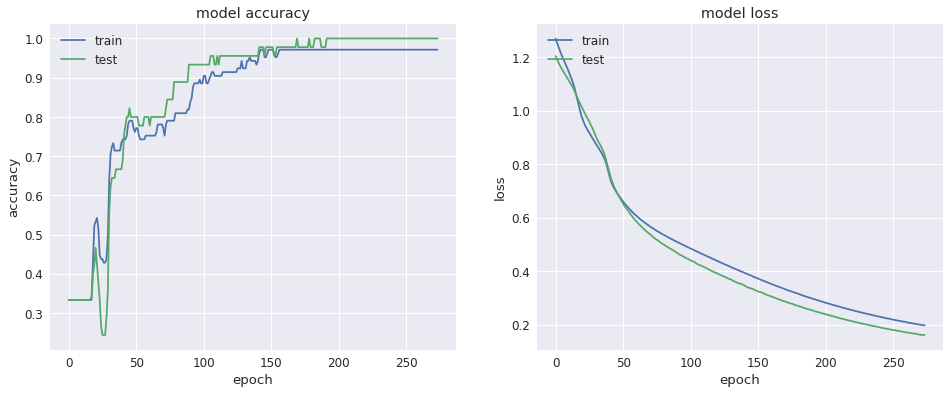

In [5]:
X, y = prepare_data()
model = train_model(X, y)

In [6]:
X[0], X[51], X[120]

(array([6.3, 3.3, 6. , 2.5]),
 array([5. , 3. , 1.6, 0.2]),
 array([6.5, 3. , 5.8, 2.2]))

In [7]:
y.toarray()[0], y.toarray()[51], y.toarray()[120]

(array([0., 0., 1.]), array([1., 0., 0.]), array([0., 0., 1.]))